In [0]:
import pandas as pd
import numpy as np

In [0]:
cloumns = ['cl1', 'cl2', 'cl3', 'cl4', 'cl5', 'cl6', 'cl7', 'cl8']
data = pd.read_csv('seeds.csv', names = cloumns)

In [5]:
data.shape

(210, 8)

In [6]:
data.columns

Index(['cl1', 'cl2', 'cl3', 'cl4', 'cl5', 'cl6', 'cl7', 'cl8'], dtype='object')

In [7]:
data.describe

<bound method NDFrame.describe of        cl1    cl2     cl3    cl4    cl5     cl6    cl7  cl8
0    15.26  14.84  0.8710  5.763  3.312  2.2210  5.220    1
1    14.88  14.57  0.8811  5.554  3.333  1.0180  4.956    1
2    14.29  14.09  0.9050  5.291  3.337  2.6990  4.825    1
3    13.84  13.94  0.8955  5.324  3.379  2.2590  4.805    1
4    16.14  14.99  0.9034  5.658  3.562  1.3550  5.175    1
5    14.38  14.21  0.8951  5.386  3.312  2.4620  4.956    1
6    14.69  14.49  0.8799  5.563  3.259  3.5860  5.219    1
7    14.11  14.10  0.8911  5.420  3.302  2.7000  5.000    1
8    16.63  15.46  0.8747  6.053  3.465  2.0400  5.877    1
9    16.44  15.25  0.8880  5.884  3.505  1.9690  5.533    1
10   15.26  14.85  0.8696  5.714  3.242  4.5430  5.314    1
11   14.03  14.16  0.8796  5.438  3.201  1.7170  5.001    1
12   13.89  14.02  0.8880  5.439  3.199  3.9860  4.738    1
13   13.78  14.06  0.8759  5.479  3.156  3.1360  4.872    1
14   13.74  14.05  0.8744  5.482  3.114  2.9320  4.825    1
15   1

In [8]:
data.head(10)

,cl1,cl2,cl3,cl4,cl5,cl6,cl7,cl8
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
5,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1
6,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,1
7,14.11,14.10,0.8911,5.420,3.302,2.700,5.000,1
8,16.63,15.46,0.8747,6.053,3.465,2.040,5.877,1
9,16.44,15.25,0.8880,5.884,3.505,1.969,5.533,1


In [9]:
data['cl8'].value_counts()

3    70
2    70
1    70
Name: cl8, dtype: int64

In [10]:
data.isnull().sum()# data.isnull().any()

cl1    0
cl2    0
cl3    0
cl4    0
cl5    0
cl6    0
cl7    0
cl8    0
dtype: int64

In [0]:
x = data.iloc[:, :-1]

y = data.iloc[:, -1]

In [12]:
x.shape

(210, 7)

In [13]:
y.shape

(210,)

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
from sklearn.model_selection import train_test_split



In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state = 0)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [0]:
sc = StandardScaler()

x_train_std = sc.fit_transform(x_train)

In [0]:
x_test_std = sc.transform(x_test)

In [0]:
from sklearn import linear_model
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x7f54799ccdd8>,
 [Text(-0.9526279613277876, 0.5499999702695114, '3'),
  Text(1.0298943251329445e-07, -1.0999999999999954, '2'),
  Text(1.0392303909145566, 0.6000001621662928, '1')],
 [Text(-0.5196152516333387, 0.29999998378336984, '33.33%'),
  Text(5.61760540981606e-08, -0.5999999999999974, '33.33%'),
  Text(0.6062177280334914, 0.35000009459700415, '33.33%')])

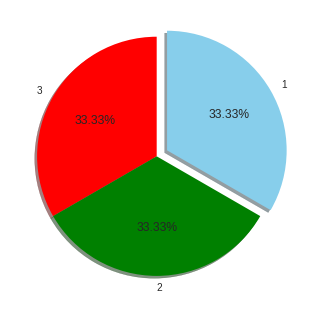

In [20]:
size = [70, 70, 70]
color = ['red', 'green', 'skyblue']
label = ['3', '2', '1']
explode = [0, 0, 0.1]
plt.pie(size, labels = label, colors = color, explode = explode, autopct = '%.2f%%', startangle = 90, shadow = True)

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
lr = LogisticRegression(C = 100)

In [0]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10000, random_state = 0, n_jobs = -1)

In [25]:
forest.fit(x_train_std, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [26]:
feat_labels = data.columns[:]

importance = forest.feature_importances_
print(importance)

indices = np.argsort(importance)[::-1]# reverse sort descending order

print(indices)

for f in range(x_train.shape[1]):
  print("%2d) %-*s %f"%(f + 1, 30, feat_labels[indices[f]], importance[indices[f]]))

[0.2021448  0.1883488  0.04089245 0.1410033  0.1235504  0.0943921
 0.20966815]
[6 0 1 3 4 5 2]
 1) cl7                            0.209668
 2) cl1                            0.202145
 3) cl2                            0.188349
 4) cl4                            0.141003
 5) cl5                            0.123550
 6) cl6                            0.094392
 7) cl3                            0.040892


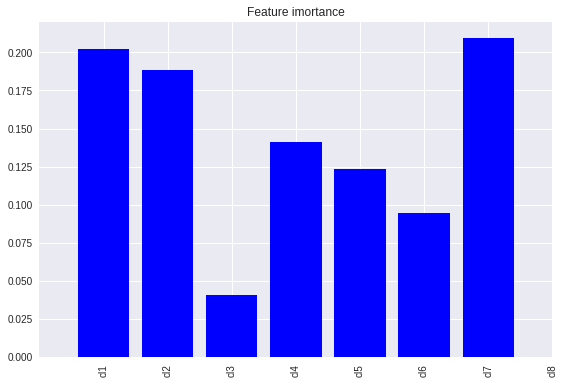

In [27]:
plt.title('Feature imortance')
plt.bar(range(x_train.shape[1]), importance, color = 'blue', align = 'center')

plt.xticks(range(x_train.shape[0]), feat_labels, rotation = 90)

plt.xlim(-1, x_train.shape[1])

plt.tight_layout()

plt.show()

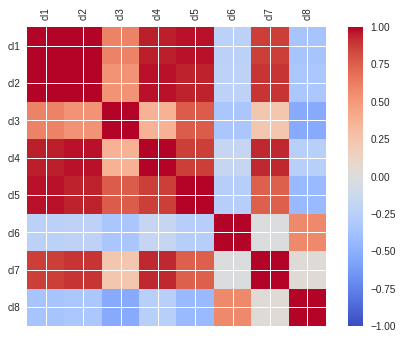

In [28]:
corr = data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()

In [0]:
y_pred = forest.predict(x_test_std)

In [0]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

In [31]:
print("accuracy_score by random forest", accuracy_score(y_pred, y_test))

accuracy_score by random forest 0.9523809523809523


In [0]:
from sklearn.model_selection import GridSearchCV

In [34]:
# usng pca learning on the seeds dataset to check the accuracy of the model

from sklearn.decomposition import PCA

x_pca = PCA(n_components = 4)

x_train_std_pca = x_pca.fit_transform(x_train_std)
x_test_std_pca = x_pca.transform(x_test_std)

print(x_train_std_pca.shape)

(147, 4)


In [35]:
forest1 = RandomForestClassifier()
forest1.fit(x_train_std_pca, y_train)

y_pred_pca = forest1.predict(x_test_std_pca)

print('accuracy_score', accuracy_score(y_test, y_pred_pca))

accuracy_score 0.8888888888888888


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:
from sklearn.model_selection import cross_val_score

In [0]:
cross_val_score = cross_val_score(estimator = forest, X = x_train_std, y = y_train, cv = 3)

In [38]:
cross_val_score.mean()

0.8908446712018141

In [39]:
parameter = [ 1, 10, 50, 100, 500, 1000, 10000]

#param_grid = [{'clf__C':parameter, 'clf__Kernel':['linear']}, {'clf__C':parameter,'clf__gamma':parameter ,'clf__Kernel':['rbf']}]
param_grid = {'C':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
             'penalty':['l1', 'l2']}
gs = GridSearchCV(estimator = lr, param_grid = param_grid, scoring = 'accuracy')

gs.fit(x_train_std, y_train)

print(gs.best_score_)
print(gs.best_params_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWar

0.9591836734693877
{'C': 10, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver t

In [40]:
param_grid1 = {'n_estimators':[30, 100, 500, 1000, 5000, 10000],
              'criterion':['gini', 'entropy'],
              
              }
gsrf = GridSearchCV(estimator = forest, param_grid = param_grid1, scoring = 'accuracy')

gsrf.fit(x_test_std, y_test)
print(gsrf.best_score_)
print(gsrf.best_params_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.9047619047619048
{'criterion': 'gini', 'n_estimators': 1000}


In [41]:
from sklearn.svm import SVC
svc = SVC()
parameter = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

#param_grid = [{'clf__C':parameter, 'clf__Kernel':['linear']}, {'clf__C':parameter,'clf__gamma':parameter ,'clf__Kernel':['rbf']}]
param_grid2 = {'C':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
              'gamma':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
             'kernel':['linear', 'rbf', 'poly','sigmoid']}
gs1 = GridSearchCV(estimator = svc, param_grid = param_grid2, scoring = 'accuracy')

gs1.fit(x_train_std, y_train)

print(gs1.best_score_)
print(gs1.best_params_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.9319727891156463
{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [42]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
xgb_model.fit(x_train, y_train)

y_pred = xgb_model.predict(x_test)

print(accuracy_score(y_test, y_pred))

0.9523809523809523


In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [0]:
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)
y_pred_lda = lda.predict(x_test)


In [45]:
print('accuracy for lda', accuracy_score(y_pred_lda, y_test))

accuracy for lda 0.9682539682539683
